# General Utilities

In [1]:
import os
import io
import zipfile
import requests

def simple_bool(message):
    choose = input(message+" (y/n): ").lower()
    your_bool = choose in ["y", "yes","yea","sure"]
    return your_bool

# def: Downloaders

In [1]:
import os
import io
import requests

# git clone
def git_clone(repo_url, save_dir = os.getcwd()):
    cmd = f'git clone {repo_url} {save_dir}'
    os.system(cmd)

def git_clone_sub(repo_url,sub ,save_dir = os.getcwd()+'\\temp\\'):
    cmd = f'git clone {repo_url} {save_dir}'
    os.system(cmd)
    # specify original path and destination path
    original_path = save_dir + sub
    destination_path = os.path.join(os.getcwd(), sub)
    os.rename(original_path, destination_path)
    delete = f'rmdir /s /q  {save_dir}'
    os.system(delete)
    print(save_dir)

# Simple Downloader
def get_file(url, file_name, dir = os.getcwd()):
    response = requests.get(url)
    if response.status_code == 200:
        content = response.content
        file_path = os.path.join(dir, file_name)
        with open(file_path, 'wb') as file:
            file.write(content)
        print(f"File downloaded successfully. Saved as {file_name}")
    else:
        print("Unable to download the file.")

# Download single GitHub file from repository
def get_gitfile(url, flag='', dir = os.getcwd()):
    url = url.replace('blob','raw')
    response = requests.get(url)
    file_name = flag + url.rsplit('/',1)[1]
    file_path = os.path.join(dir, file_name)
    if response.status_code == 200:
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"File downloaded successfully. Saved as {file_name}")
    else:
        print("Unable to download the file.")

# Download and Exrtact zip file from Zenodo
def get_and_extract_zenodo(file, dir = os.getcwd(), ext = '.zip'):
    url='https://zenodo.org/record/8205724/files/'+file+'.zip?download=1'
    zip_file_name = file+ext
    extracted_folder_name = dir
    # Download the ZIP file
    response = requests.get(url)
    if response.status_code == 200:
        # Extract the ZIP contents
        with io.BytesIO(response.content) as zip_buffer:
            with zipfile.ZipFile(zip_buffer, 'r') as zip_ref:
                zip_ref.extractall(extracted_folder_name)
        print(f"ZIP file '{zip_file_name}' extracted to '{extracted_folder_name}' successfully.")
    else:
        print("Failed to download the ZIP file.")

In [145]:
Downloader.git_clone_sub('https://github.com/johndef64/pychatgpt.git', 'bash-gpt')

C:\Users\giova\Documents\GitHub\pyutilities_datascience\temp\


In [143]:
Downloader.git_clone_sub('https://github.com/spacetx/starfish.git','starfish')

FileNotFoundError: [WinError 2] Impossibile trovare il file specificato: 'C:\\Users\\giova\\Documents\\GitHub\\pyutilities_datascience\\temp/starfish' -> 'C:\\Users\\giova\\Documents\\GitHub\\pyutilities_datascience\\starfish'

In [101]:
Downloader.git_clone('https://github.com/johndef64/pychatgpt.git', r'C:\Users\giova\Documents\GitHub\pyutilities_datascience\newrepo')

# CSV Datasets

In [33]:
# Download the file
file1 = "https://github.com/SeniorMars/pokemon-csv/blob/master/pokemon.csv"
file2 = "https://github.com/zehnzwanzig/PokemonGo_CSV/blob/master/pokemon.csv"
file3 = 'https://github.com/johndef64/GRPM_system/blob/main/human_genes_repo/H_GENES_proteincoding_genes.csv'

Downloader.get_gitfile(file1, 'base_')
Downloader.get_gitfile(file2, 'go_'  )
Downloader.get_gitfile(file3)

File downloaded successfully. Saved as base_pokemon.csv
File downloaded successfully. Saved as go_pokemon.csv
File downloaded successfully. Saved as H_GENES_proteincoding_genes.csv


In [20]:
Downloader.get_file(file1,'gagaulala.csv')

File downloaded successfully. Saved as gagaulala.csv


# def: File Operartions

In [56]:
import os
import glob
import pandas as pd

# Check files in folder (with extension)
def file_display(ext, contains='', path=os.getcwd()):
    file_pattern = os.path.join(path, "*."+ext)
    files = glob.glob(file_pattern)
    files_name = []
    for file in files:
        file_name = os.path.basename(file)
        files_name.append(file_name)

    print('Available .'+ext+' files:')
    files_df = pd.Series(files_name)
    file = files_df[files_df.str.contains(contains)]
    print(file)

def file_display_subfolders(folder_path=os.getcwd()):
    subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]
    print("Subfolders in", folder_path, ":")
    for subfolder in subfolders:
        print(subfolder)

def file_get_subfolders(folder_path=os.getcwd()):
    subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]
    return subfolders

def file_get_files(ext, contains='', path=os.getcwd()):
    file_pattern = os.path.join(path, "*."+ext)
    files = glob.glob(file_pattern)
    files_name = []
    for file in files:
        file_name = os.path.basename(file)
        files_name.append(file_name)
    filtered_file = [item for item in files_name if isinstance(item, str) and contains in item]
    return filtered_file

def file_get_files_pd(ext, contains='', path=os.getcwd()):
    # Create a file path pattern to match 'ext' files
    file_pattern = os.path.join(path, "*."+ext)
    # Use glob to get a list of file paths matching the pattern
    files = glob.glob(file_pattern)
    files_name = []
    # Get the list of 'ext' files
    for file in files:
        file_name = os.path.basename(file)
        files_name.append(file_name)
    files_sr = pd.Series(files_name)
    filtered_file = files_sr[files_sr.str.contains(contains)]
    return pd.Series(filtered_file)

def file_delete(filename, path=os.getcwd()):
    try:
        os.remove(os.path.join(path, filename))
        print(f"File {filename} deleted successfully.")
    except FileNotFoundError:
        print(f"File {filename} not found.")
    except PermissionError:
        print(f"Permission denied.")
    except Exception as e:
        print(f"Unable to delete file {filename}. Error: {str(e)}")

file_display('csv')
file_delete('H_GENES_proteincoding_genes.csv')

Available .csv files:
0       base_pokemon.csv
1         go_pokemon.csv
2      special_issue.csv
3    special_issue_2.csv
dtype: object
File H_GENES_proteincoding_genes.csv not found.


# Display CSV

In [3]:
import pandas as pd

poke_base = pd.read_csv('base_pokemon.csv')
poke_go = pd.read_csv('go_pokemon.csv', encoding='latin-1')
display(poke_go, poke_base)

,#,NAME_ENGLISH,NAME_GERMAN,NAME_FRENCH,NAME_JAPAN,NAME_KOREAN,TYP1,TYP2,GENERATION,CANDY,BUDDY_DISTANCE,MAX_HP,MAX_ATT,MAX_DEF,MAX_CP,CATCH_RATE,ESCAPE_RATE,SHINY,ICON_PATH,SPRITE_PATH
0,1,Bulbasaur,Bisasam,Bulbizarre,Fushigidane,Isanghaessi,Grass,Poison,1.0,25.0,3.0,128.0,118.0,111.0,1115.0,"20,00 %","10,00 %",Yes,./icon/001.png,./sprites/001.png
1,2,Ivysaur,Bisaknosp,Herbizarre,Fushigisou,Isanghaepul,Grass,Poison,1.0,100.0,3.0,155.0,151.0,143.0,1699.0,"10,00 %","7,00 %",Yes,./icon/002.png,./sprites/002.png
2,3,Venusaur,Bisaflor,Florizarre,Fushigibana,Isanghaekkot,Grass,Poison,1.0,NaN,3.0,190.0,198.0,189.0,2720.0,"5,00 %","5,00 %",Yes,./icon/003.png,./sprites/003.png
3,4,Charmander,Glumanda,Salamèche,Hitokage,Pairi,Fire,NaN,1.0,25.0,3.0,118.0,116.0,93.0,980.0,"20,00 %","10,00 %",Yes,./icon/004.png,./sprites/004.png
4,5,Charmeleon,Glutexo,Reptincel,Lizardo,Rijadeu,Fire,NaN,1.0,100.0,3.0,151.0,158.0,126.0,1653.0,"10,00 %","7,00 %",Yes,./icon/005.png,./sprites/005.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,805,Stakataka,Muramura,Ama-Ama,Tundetunde,Chagogchagog,Rock,Steel,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./icon/805.png,NaN
838,806,Blacephalon,Kopplosio,Pierroteknik,Zugadoon,Dupapang,Fire,Ghost,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./icon/806.png,NaN
839,807,Zeraora,Zeraora,Zeraora,Zeraora,Jeraora,Electric,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./icon/807.png,NaN
840,808,Meltan,Meltan,Meltan,Merutan,Meltan,Steel,NaN,7.0,400.0,20.0,130.0,112.0,113.0,1080.0,"30,00 %",NaN,No,./icon/808.png,./sprites/808.png


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Ability1,Ability2,Ability3,Generation,Legendary,Mythical
0,1.0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Overgrow,Chlorophyll,NaN,1,FALSE,False
1,2.0,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Overgrow,Chlorophyll,NaN,1,FALSE,False
2,3.0,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Overgrow,Chlorophyll,NaN,1,FALSE,False
3,3.1,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Thick Fat,NaN,NaN,1,FALSE,False
4,4.0,Charmander,Fire,NaN,309,39,52,43,60,50,65,Blaze,Solar Power,NaN,1,FALSE,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,805.0,Stakataka,Rock,Steel,570,61,131,211,53,101,13,Beast Boost,NaN,NaN,7,FALSE,False
929,806.0,Blacephalon,Fire,Ghost,570,53,127,53,151,79,107,Beast Boost,NaN,NaN,7,FALSE,False
930,807.0,Zeraora,Electric,NaN,600,88,112,75,102,80,143,Volt Absorb,NaN,NaN,7,TRUE,True
931,808.0,Meltan,Steel,NaN,300,65,46,65,55,35,34,Magnet Pull,NaN,NaN,7,TRUE,True


# def: Dataframe analysis

In [167]:
import pandas as pd
import re
import ast


def pd_choose(my_list):
    i = int(input('choose index:\n'+str(pd.Series(my_list))))
    return my_list[i]

# Df merger
def pd_merge_base(df1, df2, column1, column2, how= ''):
    merged_df = pd.merge(df1, df2, left_on=column1, right_on=column2, how=how)
    return merged_df

def pd_merge_select(df1, df2, how= 'inner'):
    column1 = df1.columns[int(input(pd.Series(df1.columns)))]
    column2 = df2.columns[int(input(pd.Series(df2.columns)))]
    merged_df = pd.merge(df1, df2, left_on=column1, right_on=column2, how=how)
    return merged_df

def pd_merge_select_multi(df1, df2):
    how = pd_choose(['inner', 'outer','left', 'right','cross' ])
    column1 = df1.columns[int(input(pd.Series(df1.columns)))]
    column2 = df2.columns[int(input(pd.Series(df2.columns)))]
    merged_df = pd.merge(df1, df2, left_on=column1, right_on=column2, how=how)
    return merged_df

def pd_groupby_describe(df1):
    var = ['all','number','object','bool']
    include = pd_choose(var)
    column1 = df1.columns[int(input(pd.Series(df1.columns)))]
    df1_count = df1.groupby(column1).describe(include=include).dropna(axis=1,how='all').reset_index()
    return df1_count

def pd_groupby_describe_flat(df1, include = 'all'):
    include = pd_choose(['all','number','object','bool'])
    column1 = df1.columns[int(input(pd.Series(df1.columns)))]
    df1_count = df1.groupby(column1).describe(include=include).dropna(axis=1,how='all').reset_index()
    df1_count.columns = df1_count.columns.to_flat_index()
    pattern = r"([\w]+)_([\w]+)"
    list_of_strings = []
    for tuple in df1_count.columns:
        string = "_".join(tuple)
        #string = re.sub(r"\s+", "", string)
        list_of_strings.append(string)
    df1_count.columns = list_of_strings
    return df1_count


#list = None


In [164]:
my_list = ['all','number','object','bool']
pd_choose(my_list)

ValueError: invalid literal for int() with base 10: ''

In [128]:
data = {
    'name': ['John', 'Alice', 'Bob', 'Alice'],
    'age': [25, 30, 35, 27],
    'salary': [5000, 6000, 5500, 7000],
    'city': ['New York', 'Chicago', 'New York', 'Chicago']
}
df = pd.DataFrame(data)

df.select_dtypes(include='object').columns

Index(['name', 'city'], dtype='object')

## Merge Data

In [168]:
simple_df = pd_merge_select(poke_go, poke_base, 'inner')[['NAME_ENGLISH','NAME_FRENCH','Ability1']]

ValueError: invalid literal for int() with base 10: ''

In [169]:
pd_merge_select_multi(poke_go[['NAME_ENGLISH','NAME_FRENCH']], poke_base[['Name','Ability1']])

,NAME_ENGLISH,NAME_FRENCH,Name,Ability1
0,Bulbasaur,Bulbizarre,Bulbasaur,Overgrow
1,Ivysaur,Herbizarre,Ivysaur,Overgrow
2,Venusaur,Florizarre,Venusaur,Overgrow
3,Charmander,Salamèche,Charmander,Blaze
4,Charmeleon,Reptincel,Charmeleon,Blaze
...,...,...,...,...
797,Stakataka,Ama-Ama,Stakataka,Beast Boost
798,Blacephalon,Pierroteknik,Blacephalon,Beast Boost
799,Zeraora,Zeraora,Zeraora,Volt Absorb
800,Meltan,Meltan,Meltan,Magnet Pull


## Groupby Data

In [158]:
# groupby describe
group_0 = pd_groupby_describe(poke_go)
group_0[group_0.TYP1.count]

TypeError: pd_choose() missing 1 required positional argument: 'list'

In [162]:
# groupby describe flat
df = poke_go
df['Type'] = df['TYP1'] + ','+ df['TYP2']
poke_go =df

group_1 = pd_groupby_describe_flat(poke_go, 'number')#.T#, 'str')
group_1

TypeError: pd_choose() missing 1 required positional argument: 'list'

In [134]:
type(gr.columns[0])
group_1.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
TYP1_,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#_count,76,33,27,46,18,29,55,3,28,78,34,28,105,36,56,49,26,115
#_unique,76,33,27,46,18,29,55,3,28,78,34,28,105,36,56,49,26,115
#_top,10,19A,147,25,35,56,4,641,92,1,27,27A,16,23,63,74,208,7
#_freq,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICON_PATH_freq,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
SPRITE_PATH_count,41,16,13,26,8,15,33,0,15,44,21,20,71,26,33,29,16,81
SPRITE_PATH_unique,41,16,13,26,8,15,33,0,15,44,20,20,71,26,33,28,16,81
SPRITE_PATH_top,./sprites/010.png,./sprites/019A.png,./sprites/147.png,./sprites/025.png,./sprites/035.png,./sprites/056.png,./sprites/004.png,NaN,./sprites/092.png,./sprites/001.png,./sprites/050A.png,./sprites/027A.png,./sprites/016.png,./sprites/023.png,./sprites/063.png,./sprites/074A.png,./sprites/208.png,./sprites/007.png


In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {
    'name': ['John', 'Alice', 'Bob', 'Alice'],
    'age': [25, 30, 35, 27],
    'salary': [5000, 6000, 5500, 7000],
    'city': ['New York', 'Chicago', 'New York', 'Chicago']
}
df = pd.DataFrame(data)

# Group by multiple columns
grouped = df.groupby(['city', 'name'])

# Example usage
print(grouped.size())  # Grouped size based on 'city' and 'name'
print(grouped.sum()['salary'])  # Grouped sum of 'salary' based on 'city' and 'name'
grouped.count

## Create random df

In [176]:
import pandas as pd
import random

data = {'A': [], 'B': [], 'C': []}
my_list = poke_go.NAME_ENGLISH

for _ in range(20):  # This will create a dataframe with 5 rows
    data['A'].append(random.randint(1, 10))
    data['B'].append(random.uniform(0.0, 1.0))
    data['C'].append(random.choice(my_list))

simple_df = pd.DataFrame(data)
simple_df

,A,B,C
0,7,0.931633,Staryu
1,2,0.937335,Burmy
2,2,0.365191,Slugma
3,4,0.220422,Vaporeon
4,1,0.584230,Shuckle
5,5,0.060231,Togepi
6,4,0.390357,Pelipper
7,3,0.099852,Luvdisc
8,5,0.268602,Meltan
9,7,0.042504,Clauncher


## Add columns

In [179]:
simple_df.columns[0]

'A'

In [183]:
#  Add Columns
# nuova colonna con aggiunta
import math
import random
random = random.randint(1, 10)

simple_df['new_col'] = [(int(i))*2.2 for i in range(len(simple_df))]
simple_df['new_col_2'] = simple_df[simple_df.columns[0]].apply(lambda x: math.sqrt(x))
simple_df['new_col_3'] = simple_df[simple_df.columns[1]].apply(lambda x: x*random)
simple_df

,A,B,C,new_col,new_col_2,new_col_3
0,7,0.931633,Staryu,0.0,2.645751,0.931633
1,2,0.937335,Burmy,2.2,1.414214,0.937335
2,2,0.365191,Slugma,4.4,1.414214,0.365191
3,4,0.220422,Vaporeon,6.6,2.000000,0.220422
4,1,0.584230,Shuckle,8.8,1.000000,0.584230
5,5,0.060231,Togepi,11.0,2.236068,0.060231
6,4,0.390357,Pelipper,13.2,2.000000,0.390357
7,3,0.099852,Luvdisc,15.4,1.732051,0.099852
8,5,0.268602,Meltan,17.6,2.236068,0.268602
9,7,0.042504,Clauncher,19.8,2.645751,0.042504


In [141]:
df = poke_go
df['Type'] = df['TYP1'] + ','+ df['TYP2']
poke_go =df

# Data Visualization

Column 'name' does not exist in the DataFrame.
Column 'city' does not exist in the DataFrame.


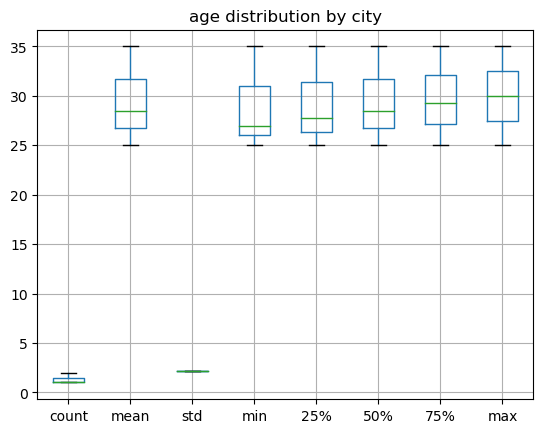

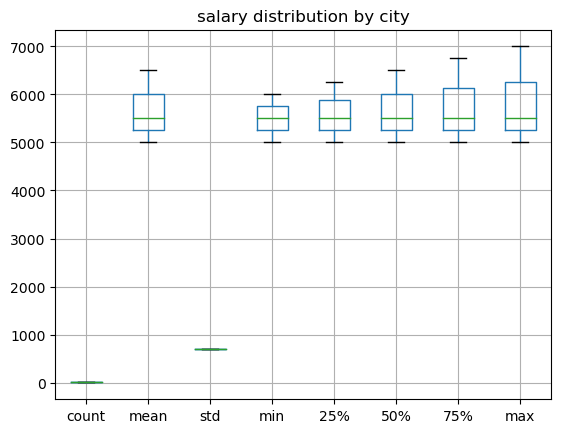

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {
    'name': ['John', 'Alice', 'Bob', 'Alice'],
    'age': [25, 30, 35, 27],
    'salary': [5000, 6000, 5500, 7000],
    'city': ['New York', 'Chicago', 'New York', 'Chicago']
}
df = pd.DataFrame(data)
# Perform groupby and describe
grouped_data = df.groupby(['name']).describe()

# Visualize string columns
string_columns = df.select_dtypes(include=['object']).columns
for column in string_columns:
    if column in grouped_data.columns:
        grouped_data[column].plot(kind='bar')
        plt.title(f"{column} distribution by city")
        plt.show()
    else:
        print(f"Column '{column}' does not exist in the DataFrame.")

# Visualize integer columns
int_columns = df.select_dtypes(include=['int', 'float']).columns
for column in int_columns:
    if column in grouped_data.columns:
        grouped_data[column].boxplot()
        plt.title(f"{column} distribution by city")
        plt.show()
    else:
        print(f"Column '{column}' does not exist in the DataFrame.")

In [74]:
import seaborn as sns
import pandas as pd


import matplotlib.pyplot as plt
plt.show()

In [81]:
poke_go

,#,NAME_ENGLISH,NAME_GERMAN,NAME_FRENCH,NAME_JAPAN,NAME_KOREAN,TYP1,TYP2,GENERATION,CANDY,BUDDY_DISTANCE,MAX_HP,MAX_ATT,MAX_DEF,MAX_CP,CATCH_RATE,ESCAPE_RATE,SHINY,ICON_PATH,SPRITE_PATH
0,1,Bulbasaur,Bisasam,Bulbizarre,Fushigidane,Isanghaessi,Grass,Poison,1.0,25.0,3.0,128.0,118.0,111.0,1115.0,"20,00 %","10,00 %",Yes,./icon/001.png,./sprites/001.png
1,2,Ivysaur,Bisaknosp,Herbizarre,Fushigisou,Isanghaepul,Grass,Poison,1.0,100.0,3.0,155.0,151.0,143.0,1699.0,"10,00 %","7,00 %",Yes,./icon/002.png,./sprites/002.png
2,3,Venusaur,Bisaflor,Florizarre,Fushigibana,Isanghaekkot,Grass,Poison,1.0,NaN,3.0,190.0,198.0,189.0,2720.0,"5,00 %","5,00 %",Yes,./icon/003.png,./sprites/003.png
3,4,Charmander,Glumanda,Salamèche,Hitokage,Pairi,Fire,NaN,1.0,25.0,3.0,118.0,116.0,93.0,980.0,"20,00 %","10,00 %",Yes,./icon/004.png,./sprites/004.png
4,5,Charmeleon,Glutexo,Reptincel,Lizardo,Rijadeu,Fire,NaN,1.0,100.0,3.0,151.0,158.0,126.0,1653.0,"10,00 %","7,00 %",Yes,./icon/005.png,./sprites/005.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,805,Stakataka,Muramura,Ama-Ama,Tundetunde,Chagogchagog,Rock,Steel,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./icon/805.png,NaN
838,806,Blacephalon,Kopplosio,Pierroteknik,Zugadoon,Dupapang,Fire,Ghost,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./icon/806.png,NaN
839,807,Zeraora,Zeraora,Zeraora,Zeraora,Jeraora,Electric,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./icon/807.png,NaN
840,808,Meltan,Meltan,Meltan,Merutan,Meltan,Steel,NaN,7.0,400.0,20.0,130.0,112.0,113.0,1080.0,"30,00 %",NaN,No,./icon/808.png,./sprites/808.png


In [76]:
gr

,TYP1_,GENERATION_count,GENERATION_mean,GENERATION_std,GENERATION_min,GENERATION_25%,GENERATION_50%,GENERATION_75%,GENERATION_max,CANDY_count,...,MAX_DEF_75%,MAX_DEF_max,MAX_CP_count,MAX_CP_mean,MAX_CP_std,MAX_CP_min,MAX_CP_25%,MAX_CP_50%,MAX_CP_75%,MAX_CP_max
0,Bug,74.0,3.743243,1.916481,1.0,2.00,4.0,5.0,7.0,19.0,...,171.00,396.0,46.0,1398.282609,817.189918,401.0,556.25,1521.5,1841.25,3101.0
1,Dark,29.0,4.275862,1.411599,2.0,3.00,5.0,5.0,7.0,6.0,...,148.00,240.0,16.0,1875.812500,870.101237,564.0,1287.25,1777.0,2368.75,3739.0
2,Dragon,27.0,4.296296,1.771892,1.0,3.00,5.0,5.5,7.0,6.0,...,198.00,268.0,13.0,2507.769231,1159.082622,1004.0,1780.00,1958.0,3644.00,3962.0
3,Electric,40.0,3.550000,1.999359,1.0,2.00,4.0,5.0,7.0,11.0,...,182.75,219.0,32.0,2046.437500,842.764573,473.0,1324.75,2156.5,2579.00,3527.0
4,Fairy,18.0,4.277778,2.191039,1.0,2.00,6.0,6.0,7.0,5.0,...,166.75,217.0,8.0,1718.625000,970.115595,657.0,1034.00,1472.5,2465.75,3332.0
5,Fighting,29.0,3.862069,2.150152,1.0,2.00,4.0,5.0,7.0,7.0,...,155.50,207.0,15.0,1760.666667,869.355317,492.0,1079.00,2031.0,2454.00,3056.0
6,Fire,53.0,3.698113,2.126616,1.0,2.00,4.0,6.0,7.0,15.0,...,173.00,244.0,33.0,2068.848485,918.758439,883.0,1323.00,1835.0,2889.00,3863.0
7,Flying,3.0,5.666667,0.577350,5.0,5.50,6.0,6.0,6.0,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ghost,27.0,4.370370,1.842827,1.0,3.00,4.0,6.0,7.0,7.0,...,193.00,254.0,15.0,2034.333333,898.998305,523.0,1282.00,2072.0,2501.50,3683.0
9,Grass,76.0,3.960526,1.989578,1.0,2.00,4.0,5.0,7.0,23.0,...,166.75,219.0,46.0,1853.760870,822.478157,395.0,1127.50,1782.0,2425.75,3592.0


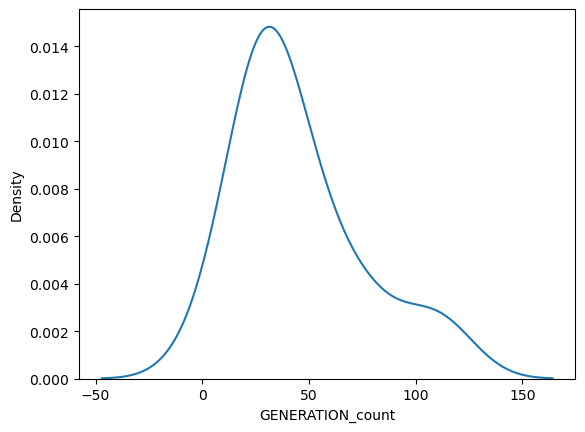

In [78]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.kdeplot(data=gr, x=gr.columns[1])
plt.show()

# Get pychatgpt

## other operations

Ci sono molte operazioni che puoi eseguire sui DataFrame di Pandas. Ecco alcuni esempi:

1. **Selezione dei dati**: Puoi selezionare dati specifici utilizzando il nome della colonna o condizioni specifiche.

   ```python
   df['colonna']  # seleziona una colonna
   df[df['colonna'] > 0]  # seleziona righe dove 'colonna' è maggiore di 0
   ```

2. **Manipolazione dei dati**: Puoi modificare i tuoi dati in molti modi, come ad esempio aggiungere nuove colonne, modificare valori esistenti, ecc.

   ```python
   df['nuova_colonna'] = df['colonna1'] + df['colonna2']  # aggiunge una nuova colonna
   df['colonna'] = df['colonna'].apply(lambda x: x*2)  # modifica i valori in 'colonna'
   ```

3. **Ordinamento**: Puoi ordinare i tuoi dati in base ai valori di una o più colonne.

   ```python
   df.sort_values(by='colonna')  # ordina in base a 'colonna'
   ```

4. **Grouping**: Puoi raggruppare i tuoi dati in base ai valori di una o più colonne e calcolare statistiche aggregate.

   ```python
   df.groupby('colonna').mean()  # calcola la media per ogni gruppo in 'colonna'
   ```

5. **Pivot**: Puoi pivotare i tuoi dati per creare una tabella pivot.

   ```python
   df.pivot_table(values='colonna1', index='colonna2', columns='colonna3')
   ```

6. **Join**: Oltre al merge, puoi anche unire DataFrame utilizzando `join`.

   ```python
   df1.join(df2, on='colonna_comune')
   ```

7. **Reshaping**: Puoi modificare la forma del tuo DataFrame utilizzando operazioni come `melt`, `pivot`, ecc.

8. **Handling Missing Values**: Puoi gestire i valori mancanti utilizzando metodi come `dropna`, `fillna`, ecc.

Questi sono solo alcuni esempi delle operazioni che puoi eseguire sui DataFrame di Pandas. Pandas è una libreria molto potente e flessibile che offre molte altre funzionalità.

In [41]:
# get & import pychatgpt (openai based module)
if simple_bool('Do you have an openai API-key?'):
    # Get pychatgpt at: https://github.com/johndef64/pychatgpt.git
    url="https://raw.githubusercontent.com/johndef64/pychatgpt/main/pychatgpt.py"
    Downloader.get_gitfile(url)

    import pychatgpt as op
    # Example usage
    message = "Describe the Cosmic Holographic Principle"
    response = op.send_message_gpt(message, model='gpt-4')

else:
    print('get your api-key at https://platform.openai.com/account/api-keys\n'
          'or simply use web playground at https://platform.openai.com/playground?model=gpt-3.5-turbo-16k')

File downloaded successfully. Saved as pychatgpt.py
The Cosmic Holographic Principle is a concept in theoretical physics and cosmology that suggests that the information and structure of our entire universe may be encoded in two-dimensional surfaces, similar to a hologram. It proposes that our three-dimensional reality, including gravity and all the particles it contains, is actually a projection or a hologram of information encoded on the two-dimensional boundary of the universe.

The idea originated from the study of black holes by physicist Jacob Bekenstein and was later developed by theoretical physicist Juan Maldacena and others. They proposed that the information contained within a black hole is proportional to the surface area of its event horizon rather than its volume, supporting the notion of a holographic representation of reality.

According to the Cosmic Holographic Principle, the universe can be thought of as a three-dimensional projection of information stored on a two-d

In [43]:
import pychatgpt as op

op.send_message_gpt('''
write a function in python optimized for the merging of two dataframe, also on different columns, in pandas

''', model='gpt-4')

Sure, if you have two dataframes in pandas, you can use the merge() function to merge them based on a common column. Below is a sample function that accept the two dataframe and column names as input and performs the merging operation.

```Python
import pandas as pd

def merge_dataframes(df1, df2, column1, column2):
    merged_df = pd.merge(df1, df2, left_on=column1, right_on=column2, how='outer')
    return merged_df
```
You can use this function to merge two dataframes. You just need to pass two dataframes and the column names you want to merge on as arguments.

The 'how' parameter can take the values 'inner', 'outer', 'left', or 'right'. 'outer' returns all records when there is a match in either df1 or df2. 'inner' returns only the records where there is a match in both dfs. 'left' (or 'right') returns all the records from df1 (or df2) and the matched records from df2 (or df1), filling with NaNs where there is no match.

Please remember to replace 'df1', 'df2', 'column1', and 'colu

# open with notepad, subprocess

In [44]:
import subprocess

def open_in_notepadpp(file_path):
    notepadpp_path = r"C:\Program Files\Notepad++\notepad++.exe"  # Path to Notepad++ executable
    subprocess.Popen([notepadpp_path, file_path])

# Usage
file_path = r"conversation_log.txt"  # Replace with the actual file path
open_in_notepadpp(file_path)

# Prompt for keyword-mesh

In [ ]:
# Define Biomedical topics
nutritional_topic = [['diseases and disorders realted to nutrition and diet ', 'diet, food consuption, eating behaviour and nutrition']]
infective_topic = [['infective agents, bacteria, virus and protozoan','infective diseases']]
reproductive_topic = [['reproductive system physiology','reproductive system pathology', 'Assisted reproductive technology']]
female_infertility_topic = [['female infertility, genetic imprinting and maternal effect']]
special_issue = [['Diagnosis and Therapies for Genetic Diseases']]

nutritional_topics = [
    ['Obesity, overweight and body weight control', 'compulsive eating behavior'],
    ['cardiovascular diseases','physiological processes realted to cardiovascular diseases','lipid metabolism in the context of cardiovascular diseases'],
    ['Diabetes Melitus Type II and metabolic syndrome'],
    ['Vitamin metabolism and Vitamins recommended intake levels','Micronutrients metabolism and Micronutrient recommended intake levels', 'disease related to vitamins and micronutrients deficiency'],
    ['eating behaviour and taste sensation'],
    ['food intolerances'],
    ['food allergies'],
    ['diet-induced oxidative stress'],
    ['metabolism of xenobiotics'],
]
chosen_topic = special_issue
pd.Series(chosen_topic)

In [ ]:
# GPT prompts

# parameters--------------------------------------
object1 = 'Pubmed MeSH terms'
object2 = 'Pubmed keywords'

object= object1
num_mesh = 100
topics = chosen_topic
topic_id = 0
#-----------------------------------------------
topic_01  = topics[topic_id][0]
topic_02  = topics[topic_id][1] if len(topics[topic_id])>=2 else None
topic_03  = topics[topic_id][2] if len(topics[topic_id])>=3 else None

format = {'list': ". Create a python list format like this:\n gpt_01 = [\"term1\",\n \"term2\",\n \"term3\",...]",
          'csv':  ". Create a CSV file like this:\n gpt_terms,\n \"term1\",\n \"term2\",\n \"term3\", ..."}
format = format['csv']

prompt_01 = "give me a comprehensive list of "+str(num_mesh)+" real "+object+" terms related to "+ topic_01+format+"\n"
prompt_02 = "give me a comprehensive list of "+str(num_mesh)+" real "+object+" terms related to "+ topic_02 +format+"\n" if len(topics[topic_id])>=2 else None
prompt_03 = "give me a comprehensive list of "+str(num_mesh)+" real "+object+" terms related to "+ topic_03 +format+"\n" if len(topics[topic_id])>=3 else None

prompts = [prompt_01, prompt_02, prompt_03]
# If you do not have an openai API key, paste these prompts at https://platform.openai.com/playground?model=gpt-3.5-turbo-16k

import pyperclip
pyperclip.copy(prompt_01)
pyperclip.copy(prompt_01+prompt_02) if len(topics[topic_id])>=2 else None
pyperclip.copy(prompt_01+prompt_02+prompt_03) if len(topics[topic_id])>=3 else None

print('prompt_01:',prompt_01)

In [ ]:
# get GPT-terms
import pychatgpt as op
op.conversation_gpt =[]
response = op.send_message_gpt(prompt_01, model='gpt-4', maxtoken=2000)
#response = op.send_message_gpt('clearchat')

print('''\n\nGet the GPT terms from 'conversation_log.txt'
=> save them manually in csv format in "ref-mesh-archive/gpt_terms/yourterms.csv"''')

In [ ]:
file_path = 'special_issue_2.csv'
content = '''gpt_terms
"Genetic Diseases Diagnosis",
"Genetic Testing",
"Molecular Diagnostics",
"Genetic Screenings",
"DNA Sequencing",
"Genome Mapping",
"Chromosomal Abnormalities",
"Prenatal Diagnosis",
"Newborn Screening",
"Personalized Medicine",
"Genetic Counseling",
"Carrier Testing",
"Genomic Medicine",
"Pharmacogenetics",
"Predictive Testing",
"Presymptomatic Testing",
"Biochemical Testing",
"Genetic Therapies",
"Gene Therapy",
"Gene Editing",
"CRISPR-Cas9",
"Stem Cell Therapy",
"RNA Therapy",
"Genetic Surgery",
"Molecular Therapy",
"Enzyme Replacement Therapy",
"Antisense Therapy",
"Gene Silencing",
"Genetic Vaccine",
"Pharmacological Chaperones"
'''
def write_to_file(file_path, content):
    with open(file_path, 'w') as file:
        file.write(content)

write_to_file(file_path, content)

In [ ]:
op.send_message_gpt('how to say, if a apackahger is not instaled, intall it?')

# Get Zenodo Nbib Dataset (full)

In [ ]:
import os
import io
import sys
import glob
import zipfile
import requests
from datetime import datetime

def simple_bool(message):
    choose = input(message+" (y/n): ").lower()
    your_bool = choose in ["y", "yes","yea","sure"]
    return your_bool

def get_and_extract_zenodo(file, dir = os.getcwd(), ext = '.zip'):
    url='https://zenodo.org/record/8205724/files/'+file+'.zip?download=1'
    zip_file_name = file+ext
    extracted_folder_name = dir
    # Download the ZIP file
    response = requests.get(url)
    if response.status_code == 200:
        # Extract the ZIP contents
        with io.BytesIO(response.content) as zip_buffer:
            with zipfile.ZipFile(zip_buffer, 'r') as zip_ref:
                zip_ref.extractall(extracted_folder_name)
        print(f"ZIP file '{zip_file_name}' extracted to '{extracted_folder_name}' successfully.")
    else:
        print("Failed to download the ZIP file.")

if simple_bool('Download nbib-data from Zenodo?\n (careful! 5GB unpacked)'):
    timea = datetime.now()
    get_and_extract_zenodo('nbib_data')
    print('Download and extraction time ',datetime.now()-timea)

#set source dataset:-----------------------
db_tag = 'pcg'
db_name = 'grpm_db_' + db_tag
db_path = 'grpm_dataset/'+db_name

time1 = datetime.now()
#import gene-fullnbib
dummy_nbib = pd.read_csv(db_path+'/complete_nbibtable.csv', index_col=0)
dummy_nbib['pubmed_id'] = dummy_nbib['pubmed_id'].astype(str)
time2 = datetime.now()
print('time import nbib: ', time2-time1)
print(dummy_nbib.memory_usage().sum() / 1024 / 1024, 'MB')

display(dummy_nbib)

# R in Python

You can run R code in a Jupyter notebook. You need to install the rpy2 package and load the R extension in Jupyter using the following steps:

1. Install the rpy2 package using pip (Python's package installer). In a command line window run:
   ```bash
   pip install rpy2
   ```

2. Then, in your Jupyter notebook, load the rpy2 extension by adding this to a cell and running it:
   ```python
   %load_ext rpy2.ipython
   ```

3. Now you can use R in any cell by starting the cell with `%%R`. For example:
   ```python
   %%R
   x <- seq(0, 2*pi, length.out=50)
   y <- sin(x)
   plot(x, y, main="y = sin(x)")
   ```

Remember, the rpy2 package requires that R is installed on your machine and it relies on dynamic libraries that R uses, so be sure you have installed R and it is findable by rpy2.

In [128]:
!pip install rpy2

     ---------------------------------------- 0.0/219.3 kB ? eta -:--:--
     -------------------------------------  215.0/219.3 kB 6.6 MB/s eta 0:00:01
     -------------------------------------- 219.3/219.3 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Created wheel for rpy2: filename=rpy2-3.5.14-py3-none-any.whl size=220698 sha256=4e3a3c2aad41071a0d37420d20a6d3501089a05f117717d390a964193833c182
  Stored in directory: c:\users\giova\appdata\local\pip\cache\wheels\d4\b5\2f\529c5de71addd73d8e3c51104721d9e084c97ed2ce1c69de2d
Successfully built rpy2


In [2]:
%load_ext rpy2.ipython

C:\Users\giova\.conda\envs\myenv01\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


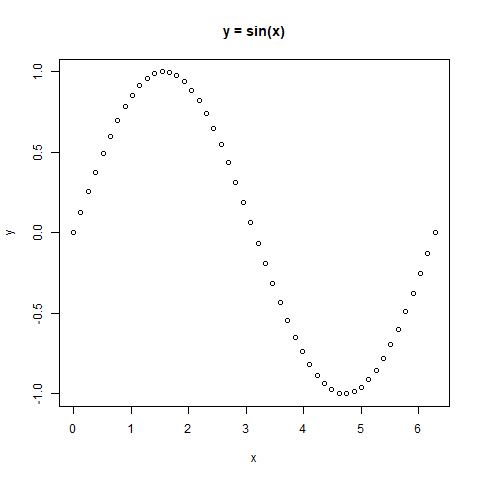

In [3]:
%%R
x <- seq(0, 2*pi, length.out=50)
y <- sin(x)
plot(x, y, main="y = sin(x)")

# Repo Links

In [97]:
# quick open in colab

handle = "https://colab.research.google.com/github/"
path = "johndef64/pychatgpt/blob/main/pychatgpt_trial.ipynb"
path1 = "spacetx/starfish/blob/master/notebooks/DARTFISH.ipynb"
import pyperclip
pyperclip.copy(handle+path1)